Creating ANN using pytorch


In [70]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [71]:
#preprocessing
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [72]:
import seaborn as sns
df['Outcome'] = np.where(df['Outcome'] == 1, "Diabetic", "Non diabetic")

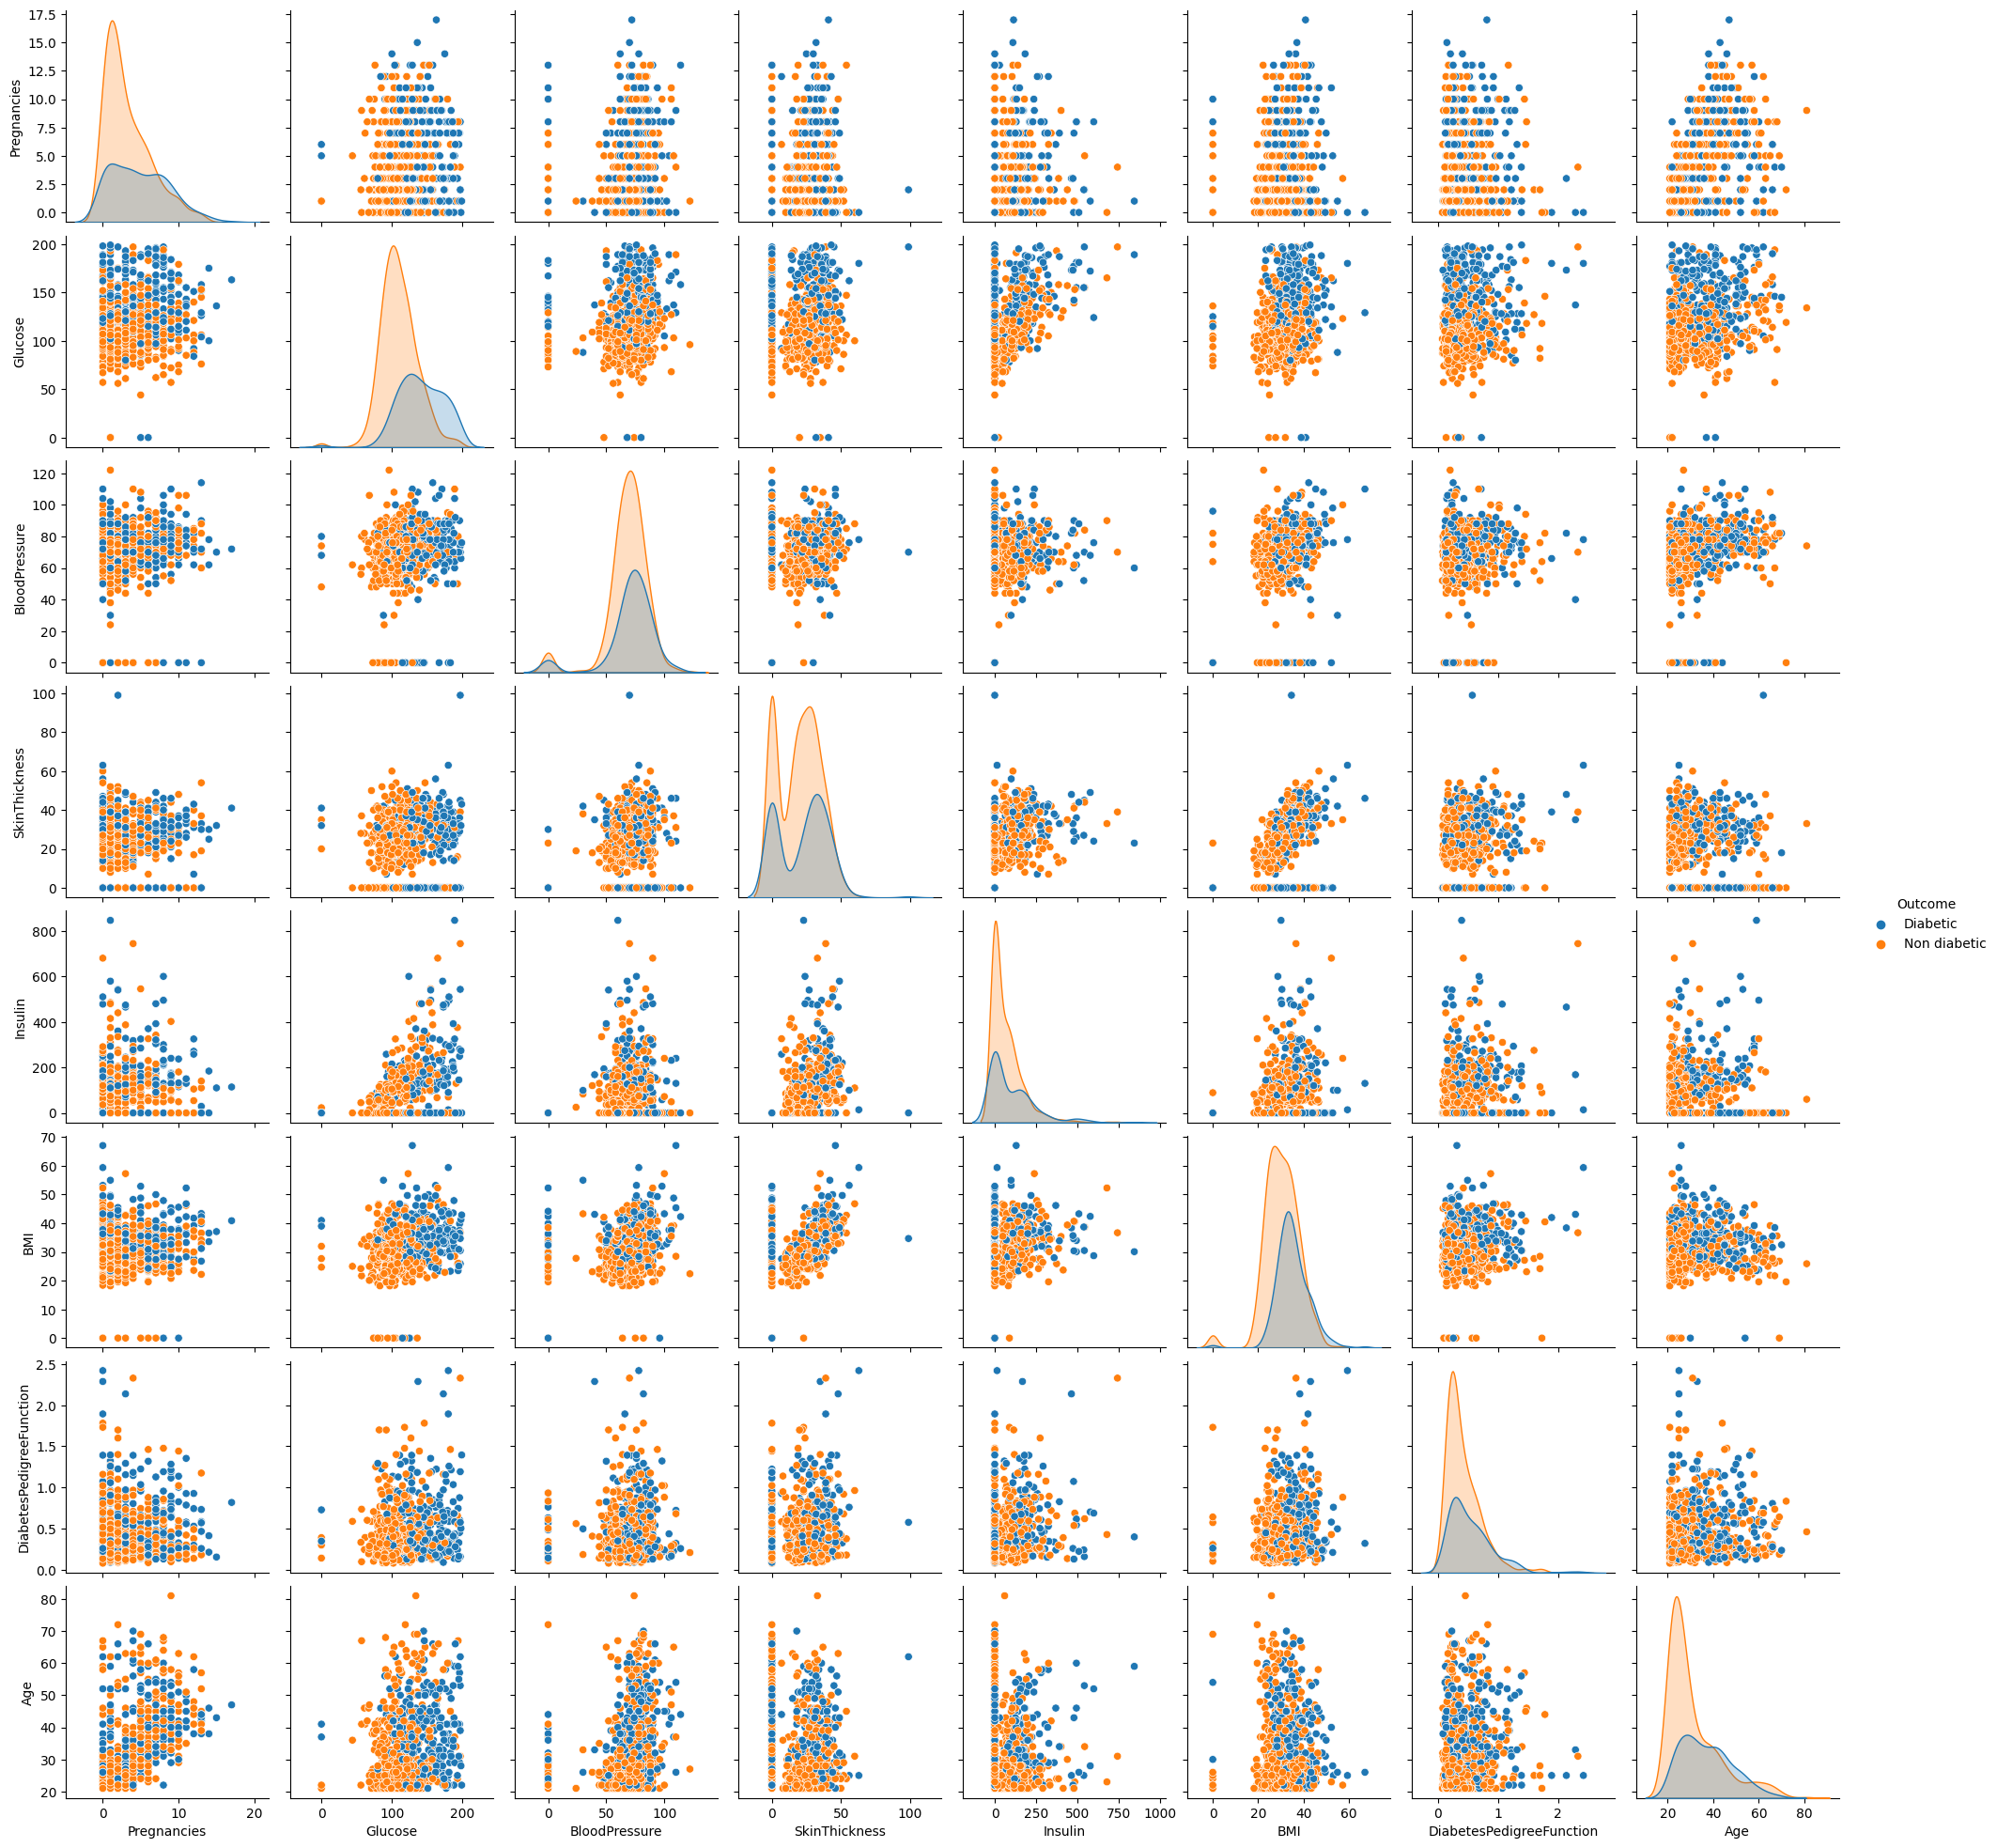

In [73]:
sns.pairplot(df, hue = "Outcome")

In [74]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [75]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=  1).values
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [76]:
###libraries from pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [77]:

###Creating tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [78]:
import torch.nn as nn
import torch.nn.functional as F

class ANN_Model(nn.Module):

  def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
    super().__init__()
    self.f_connected1 = nn.Linear(input_features, hidden1)
    self.f_connected2 = nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, out_features)

  def forward(self, x):
    x = F.relu(self.f_connected1(x))
    x = F.relu(self.f_connected2(x))
    x = self.out(x)
    return x


In [79]:
### instantiate ANN_Model.
torch.manual_seed(20)
model = ANN_Model()
model.parameters


<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [80]:
###backward propogation -- define the loss function, define the optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [81]:
epochs = 500
final_losses = []
for i in range(epochs):
  i = i+1
  y_pred = model.forward(X_train)
  loss = loss_function(y_pred, y_train)
  final_losses.append(loss)
  if i%10 == 1:
    print("Epoch number: {} and the loss : {}".format(i, loss.item()))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number: 1 and the loss : 3.4572105407714844
Epoch number: 11 and the loss : 0.8019208312034607
Epoch number: 21 and the loss : 0.6090322136878967
Epoch number: 31 and the loss : 0.5917770266532898
Epoch number: 41 and the loss : 0.5679708123207092
Epoch number: 51 and the loss : 0.5529041886329651
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.5220361351966858
Epoch number: 91 and the loss : 0.5135971903800964
Epoch number: 101 and the loss : 0.5061254501342773
Epoch number: 111 and the loss : 0.49834102392196655
Epoch number: 121 and the loss : 0.4960551857948303
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.4756035804748535
Epoch number: 151 and the loss : 0.48334649205207825
Epoch number: 161 and the loss : 0.4882740080356598
Epoch number: 171 and the loss : 0.4693370461463928
Epoch number: 181 and the loss : 0.46626102924346924
Epoch number: 191 a

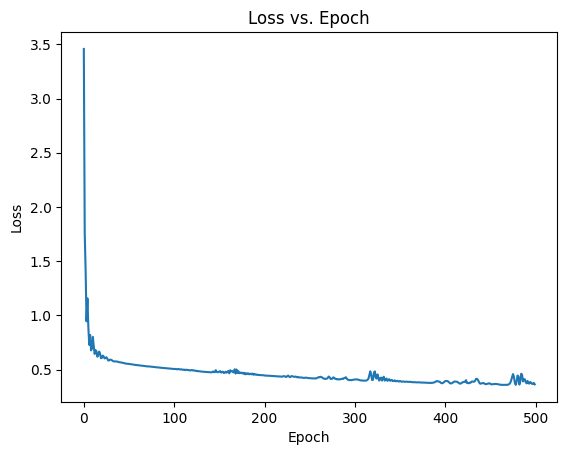

In [92]:
import matplotlib.pyplot as plt
import torch

# Plot the data
plt.plot(torch.tensor(epochs), torch.tensor(final_losses))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()


In [95]:
##prediction in X_test data
predictions = []
with torch.no_grad():
  for i , data in enumerate(X_test):
    y_pred = model(data)
    predictions.append(y_pred.argmax().item())
    print(model(data))

tensor([2.0223, 4.4617])
tensor([ 2.4551, -0.9698])
tensor([2.2891, 0.8214])
tensor([0.3827, 0.7294])
tensor([2.3465, 1.2713])
tensor([ 3.7308, -1.3304])
tensor([-0.6178,  1.2387])
tensor([0.1286, 1.5755])
tensor([-0.5273, -0.6119])
tensor([ 0.6106, -1.3285])
tensor([-0.1488,  0.6837])
tensor([-0.9989,  1.7634])
tensor([2.4246, 0.7233])
tensor([-1.9247,  0.5876])
tensor([ 3.1586, -2.1260])
tensor([2.3178, 0.2230])
tensor([-0.0821,  1.5786])
tensor([ 2.5434, -0.4680])
tensor([1.6513, 1.4213])
tensor([0.9924, 0.0759])
tensor([1.2431, 2.7994])
tensor([3.4695, 1.7434])
tensor([1.6475, 0.7834])
tensor([ 4.1150, -2.8354])
tensor([ 2.6172, -2.0890])
tensor([1.6428, 1.8830])
tensor([ 3.1154, -0.0545])
tensor([-0.9902,  1.3351])
tensor([2.3056, 0.8479])
tensor([2.2285, 1.2772])
tensor([0.6590, 0.2671])
tensor([1.3238, 0.4163])
tensor([0.8425, 0.0074])
tensor([-0.1369,  0.3821])
tensor([2.3282, 0.6282])
tensor([3.1206, 4.8069])
tensor([-0.0457,  0.7004])
tensor([ 4.4724, -1.6347])
tensor([0.8677

In [96]:
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[94, 13],
       [17, 30]])

Text(95.72222222222221, 0.5, 'Predicted Values')

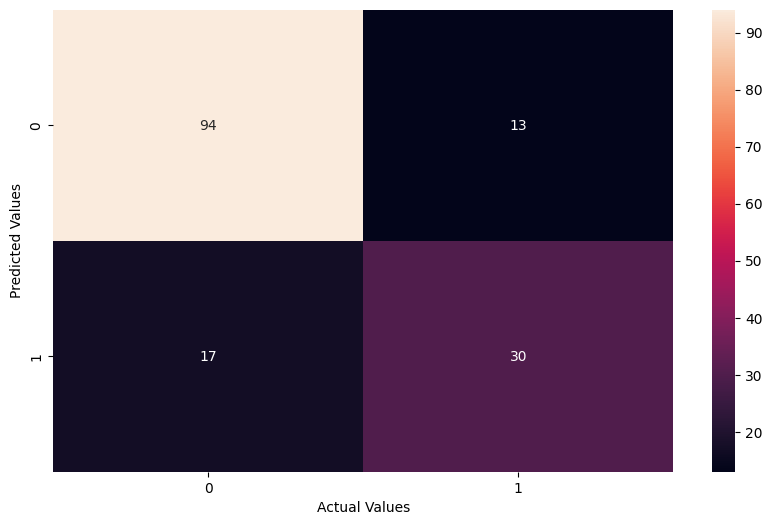

In [100]:
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [101]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)

In [102]:
score

0.8051948051948052

In [103]:
#save the model
#extension of pytorch model is .pt

torch.save(model, 'diabetes.pt')

In [104]:
model = torch.load('diabetes.pt')

In [105]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [106]:
###prediction of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [107]:
lst = [6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]
new_data  = torch.tensor(lst)

#predict new data using pytorch.
with torch.no_grad():
  print(model(new_data))
  print(model(new_data).argmax().item())

tensor([0.7543, 2.6481])
1
